In [ ]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms
import torchvision.models as models
import matplotlib.pyplot as plt
from tqdm import tqdm
import timm
import numpy as np
from torch.utils.data import random_split

In [ ]:
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    download = True,
    train = True,
    transform = transforms.Compose([
        transforms.Resize(73), 
        transforms.ToTensor(),
    ])
)
test_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    download=True,
    train=False,
    transform = transforms.Compose([
        transforms.Resize(73), 
        transforms.ToTensor(),
    ])
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



In [ ]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(train_set, batch_size=batch_size)
test_dataloader = DataLoader(test_set, batch_size=batch_size)

In [ ]:
from torch import nn
class Model(nn.Module):
    def __init__(self, in_channels=1, num_classes=10):
        super(Model, self).__init__()

        self.model = timm.create_model('inception_v3', pretrained=False)
        self.model.Conv2d_1a_3x3.conv = nn.Conv2d(in_channels, 32, kernel_size=3, stride=1, bias=False)
        num_ftrs = self.model.fc.in_features
        self.model.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        return self.model(x)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [ ]:
model = Model()
model = model.to(device)

learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
criterion = nn.CrossEntropyLoss()
epochs = 15

In [ ]:
def train():
    loss = 0
    for j,(images,targets) in enumerate(tqdm(train_dataloader)):
        images, targets = images.to(device), targets.to(device)

        y_pred = model(images)

        loss = criterion(y_pred,targets.reshape(-1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return loss

def test():
    model.eval() #sqitch mode to evaluation
    test_loss = 0
    with torch.no_grad():
        for X, y in tqdm(test_dataloader):
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += criterion(pred, y).item()
    test_loss /= len(test_dataloader)
    return test_loss

In [ ]:
losses_train = []
losses_test = []

for i in range(epochs):
    print(f"Epoch {i+1}")
    loss_train = train()
    losses_train.append(loss_train)
    loss_test = test()
    losses_test.append(loss_test)
    print(f"\nLoss train: {loss_train}, Loss test: {loss_test}")

Epoch 1


100%|██████████| 157/157 [00:25<00:00,  6.22it/s]



Loss train: 1.792834758758545, Loss test: 1.7983603705266478
Epoch 2


100%|██████████| 157/157 [00:25<00:00,  6.17it/s]



Loss train: 0.8804064989089966, Loss test: 0.8601354607351267
Epoch 3


100%|██████████| 157/157 [00:25<00:00,  6.17it/s]



Loss train: 0.6221702098846436, Loss test: 0.6778616434449602
Epoch 4


100%|██████████| 157/157 [00:25<00:00,  6.19it/s]



Loss train: 0.5773144960403442, Loss test: 0.5909616842771032
Epoch 5


100%|██████████| 157/157 [00:26<00:00,  6.01it/s]



Loss train: 0.5406873226165771, Loss test: 0.5338849729033792
Epoch 6


100%|██████████| 157/157 [00:25<00:00,  6.21it/s]



Loss train: 0.5560613870620728, Loss test: 0.5229265059635138
Epoch 7


100%|██████████| 157/157 [00:25<00:00,  6.24it/s]



Loss train: 0.4278775453567505, Loss test: 0.5011162325075478
Epoch 8


100%|██████████| 157/157 [00:25<00:00,  6.22it/s]



Loss train: 0.3791607916355133, Loss test: 0.46726329871423683
Epoch 9


100%|██████████| 157/157 [00:25<00:00,  6.25it/s]



Loss train: 0.38530203700065613, Loss test: 0.4701431775169008
Epoch 10


100%|██████████| 157/157 [00:25<00:00,  6.23it/s]



Loss train: 0.3384334444999695, Loss test: 0.4335532652534497
Epoch 11


100%|██████████| 157/157 [00:25<00:00,  6.24it/s]



Loss train: 0.3099997341632843, Loss test: 0.4037093133873241
Epoch 12


100%|██████████| 157/157 [00:25<00:00,  6.22it/s]



Loss train: 0.29442930221557617, Loss test: 0.40514878596469855
Epoch 13


100%|██████████| 157/157 [00:25<00:00,  6.27it/s]



Loss train: 0.33001941442489624, Loss test: 0.4174927880240094
Epoch 14


100%|██████████| 157/157 [00:25<00:00,  6.24it/s]



Loss train: 0.27771326899528503, Loss test: 0.37633458747985254
Epoch 15


100%|██████████| 157/157 [00:25<00:00,  6.25it/s]


Loss train: 0.28174489736557007, Loss test: 0.4078878790709623


In [ ]:
losses_train_ = [el.item() for el in losses_train]

Text(0, 0.5, 'loss')

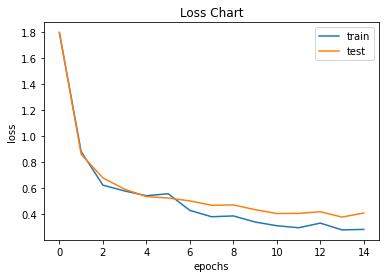

In [ ]:
plt.title('Loss Chart')
plt.plot(losses_train_, label = "train")
plt.plot(losses_test, label = "test")
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

In [ ]:
def predict(dataloader):
    pred_list = []

    for X, y in tqdm(dataloader):
        X = X.to(device)
        pred = model(X)
        pred = pred.detach().cpu()

        for i in range(len(y)):
            pred_list.append((pred[i], y[i]))
    
    return pred_list

In [ ]:
x_test_features = predict(test_dataloader)
test_features = [el[0].numpy() for el in x_test_features]
label_test =  [el[1].item() for el in x_test_features]

100%|██████████| 157/157 [00:24<00:00,  6.30it/s]


In [ ]:
from sklearn.manifold import TSNE
tsne_obj = TSNE(n_components=2,
                init='pca',
                random_state=101,
                method='barnes_hut',
                n_iter=500,
                verbose=2)
tsne_features = tsne_obj.fit_transform(test_features)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.018s...
[t-SNE] Computed neighbors for 10000 samples in 0.642s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.160786
[t-SNE] Computed conditional probabilities in 0.438s


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[t-SNE] Iteration 50: error = 72.4805679, gradient norm = 0.0041760 (50 iterations in 5.546s)
[t-SNE] Iteration 100: error = 73.2693329, gradient norm = 0.0018069 (50 iterations in 5.083s)
[t-SNE] Iteration 150: error = 73.5302048, gradient norm = 0.0012027 (50 iterations in 5.151s)
[t-SNE] Iteration 200: error = 73.5901108, gradient norm = 0.0005578 (50 iterations in 5.216s)
[t-SNE] Iteration 250: error = 73.6106873, gradient norm = 0.0003892 (50 iterations in 5.276s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.610687
[t-SNE] Iteration 300: error = 2.4339366, gradient norm = 0.0009892 (50 iterations in 5.205s)
[t-SNE] Iteration 350: error = 2.1703649, gradient norm = 0.0004870 (50 iterations in 5.185s)
[t-SNE] Iteration 400: error = 2.0115645, gradient norm = 0.0003112 (50 iterations in 4.923s)
[t-SNE] Iteration 450: error = 1.9044297, gradient norm = 0.0002263 (50 iterations in 4.780s)
[t-SNE] Iteration 500: error = 1.8265753, gradient norm = 0.0001693 (50 

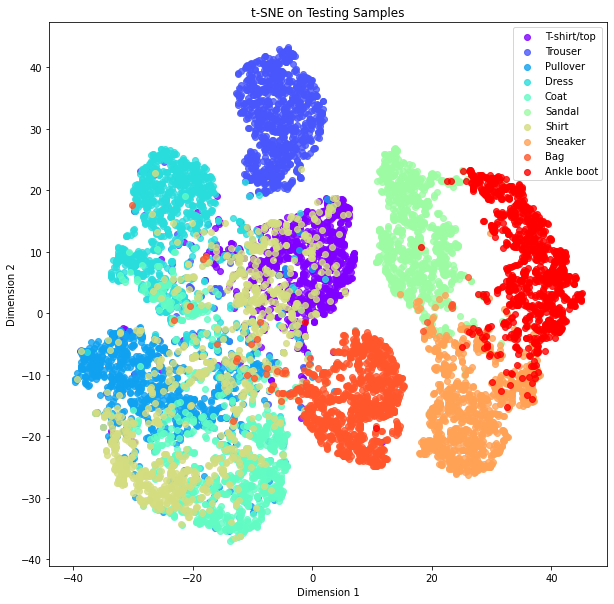

In [ ]:
obj_categories = [
                  'T-shirt/top',
                  'Trouser',
                  'Pullover',
                  'Dress',
                  'Coat',
                  'Sandal',
                  'Shirt',
                  'Sneaker',
                  'Bag',
                  'Ankle boot'
]
colors = plt.cm.rainbow(np.linspace(0, 1, 10))
plt.figure(figsize=(10, 10))

for c_group, (c_color, c_label) in enumerate(zip(colors, obj_categories)):
    plt.scatter(tsne_features[np.where(np.array(label_test)  == c_group), 0],
                tsne_features[np.where(np.array(label_test) == c_group), 1],
                marker='o',
                color=c_color,
                linewidth='1',
                alpha=0.8,
                label=c_label)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE on Testing Samples')
plt.legend(loc='best')
plt.savefig('clothes-dist.png')
plt.show(block=False)